## Overview
Anomaly detection is about “Identifying unusual data pattern that does not conform to expected behavior”. Although not all detected anomalies are possibly harmful, but identifying such outliers and bringing to notice is perhaps crucial. In most cases training a model to detect anomaly is very challenging, because outlier occurrences in data set are very sparse (for example 0.001%) thus creating bias. 
## Types of anomalies
### a.	Point anomalies: 
An instance of data (observation) which is too far from rest of observations. 
Let’s say, in a time-series a data point is deviating off from other observations by 5 standard deviation. 
Example -
An IoT device records temperature in Toronto, in month of January: 
    1. “–10 centigrade, at 8:00 AM”, 
    2. “-10 centigrade, at 8:15 AM”, 
    3. “-30 centigrade, at 8:30 AM”, 
    4. “-09 centigrade, at 8:45 AM”.  
In this time-series “-30 centigrade, at 8:30 AM” is an outlier or anomaly.  In such case, data anomaly may raise suspicion that single fluctuation was due to noise.

### b.	Contextual anomalies: 
A data point does not conform to normal behaviour in defined Context.  In this case “Context” acts as pivot in determining whether a data point is outlier.
Let’s build on previous example -
An IoT device records temperature in Toronto, in month of June:  
    1. “–10 centigrade, at 8:00 AM”.
    2. “–10 centigrade, at 8:15 AM”.
    3. “–10 centigrade, at 8:30 AM”.

In this case, data points “–10 centigrade” in month June (Context) is outlier. 
Although IoT device consistently records “-10 centigrade”, and there is no drastic deviation between successive readings, data in given Context (Season summer) does not conform to normal.  “-10 centigrade” is normal in month of January, but it is an outlier in month of June. 
In such case, data anomaly may raise suspicion that IoT device is broken and not recordings true temperature.

### c.	Collective anomalies: 
“Collection of related data points” does not conform to normal behaviour. The individual data points in collection may or may not be anomalies by themselves, but their combined occurrence as a collection decides whether it is anomalous.

Let’s build on previous example -
 a) An IoT device (device#1) records temperature in Toronto, in month of April:  
    1. “15.4 centigrade, at 12:00 PM”.
    2. “15.5 centigrade, at 12:15 PM”.
    3. “15.6 centigrade, at 12:30 PM”.

b) An IoT device(device#2), at same location and time as first IoT (device#1), records snow flurries:  
    1. “0.3 centimeter, at 12:00 PM”.
    2. “0.2 centimeter, at 12:15 PM”.
    3. “0.2 centimeter, at 12:30 PM”.

It is possible to get snow flurries in month of April, also temperature might rise to 15 centigrade (early summer glimpse). But both, flurries and 15 centigrade high temperature does not occur simultaneously. 

Independent data/readings from both IoTs appear valid Contextually (Seasonal behaviour of April) as well as valid Time-series (successive data are within deviation range).

However, if data from both IoT are integrated together, then as Collection data does not conform to reality. Because at same time and same location it is very unlikely to have temperature as high as “15 centigrade” and “Snow flurries” together. 
So, as collection above observation/data point is an outlier.

In such case, data anomaly may raise suspicion that one of IoT device is broken, because they conflict each other as collective unit.

## Commonly used detection techniques
### a. Statistical approach: 
This is the simplest approach to identify irregularities based on statistical properties such as z-score, distribution, mean, quartile etc. 
Let take a very simple example, say we have a time-series data and want to flag fluctuation if any in new data points. For such case, you can compute rolling average (. i.e. mean/average of rolling window), and when new data arrives compare it with current rolling average. If deviation is more than specified threshold then flag the new data point as outlier. 
Statistical approach is useful in simple use case where you can predefine criteria and check data against it, anything which does not satisfy criteria is outlier. 
Statistical approach cannot handle complex situations, for example malicious adversaries constantly and slowly (small incremental value) inject abnormal behaviour. Statistical approach can only handle simple use cases. 
Also, as number of feature (dimensions) increases, it becomes very challenging for Statistical approach to adapt (learn) to changing dynamics.
### b.	Machine learning approach: 
   -Density based - This approach is useful when data points occur around dense neighbourhood.  The nearest set of data points are evaluate based on measure of distance, for example Euclidian distance or similar measure based on data type. If data is far away from neighbourhood then it will be considered as outlier.

   -Cluster based (Unsupervised) – Data points are similar and tend to belong to similar group (cluster).  Distance of data point from centroid of cluster determines which cluster does data belong. Data instances that fall outside of groups could potentially be marked as anomalies. K-Means method is used to evaluate distance between cluster and data point.
    
   -Isolation forest -  Similar to Random Forest, it is built on an ensemble of binary (isolation) trees.
    
   -LocalOutlierFactor
    
   -Deep learning - Neural network deep learning outperforms in most cases, however it required intense compute and training.

### We will use "creditcard.csv" dataset, and perform following tasks
    1. Inspect and explore data set
        - Shape of data set 
        - Missing data
        - Statistical description
        - Correlation between features
        - Percentage of Fraud cases and Normal cases
    2. Build and evaluate model
        - Isolation Forest Algorithm 
        - LocalOutlierFactor Algorithm 
        
    3. Compare performance of above two models
    
    4. Observation and Suggestions
    

In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataFrame = pd.read_csv('data/creditcard.csv')

In [23]:
#number of rows and columns
dataFrame.shape

(284807, 31)

### Inspect features columns and target/dependent variable of data set.
Last column "Class" in dataFrame - is target/dependent variable. It inidcates whether observation is "Normal" or "Fraud".

In [24]:
dataFrame.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Inspect missing / null values

In [25]:
dataFrame.isnull().values.any()

False

#### Observation - Data set has no missing data.

In [26]:
dataFrame.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Inspect percentage of Normal vs Fraud data points


% of Fraud (outlier) cases in dataset = 0.1727485630620034



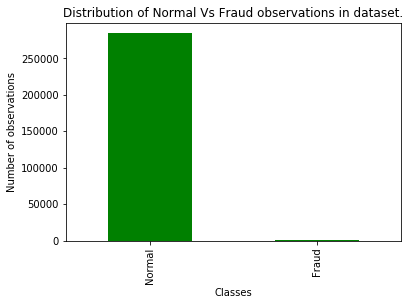

In [27]:
count_by_class = pd.value_counts(dataFrame['Class'], sort = True)

## % of Fraud observations
print("")
print("% of Fraud (outlier) cases in dataset =",(count_by_class[1]/(count_by_class[1]+count_by_class[0])) * 100)
print("")

##Graphical view
count_by_class.plot(kind='bar', color="g")
plt.title("Distribution of Normal Vs Fraud observations in dataset.")
plt.xlabel("Classes")
plt.xticks(range(2), ["Normal", "Fraud"])
plt.ylabel("Number of observations");

Statistics shows "Fraud" class are only 0.17 percent in data set. Hence, data set is highly biased towards "Normal" class, .i.e. "Normal" by far outnumbers "Fraud". This is normal dataset for Anomaly detection cases, .i.e percentage of anomaly will be less than 1%

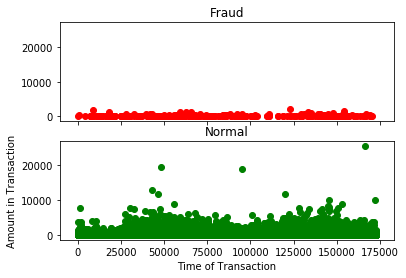

In [28]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
plt.xlabel('Time of Transaction')
plt.ylabel('Amount in Transaction')

fraud_observations = dataFrame[dataFrame['Class']==1]
ax1.scatter(fraud_observations.Time, fraud_observations.Amount, color='r')
ax1.set_title('Fraud')

normal_observations = dataFrame[dataFrame['Class']==0]
ax2.scatter(normal_observations.Time, normal_observations.Amount, color='g')
ax2.set_title('Normal')


plt.show()

Not any visible pattern between Time, Amount and Fraud

### Inspect correlation between features

In [29]:
correlation_matrix = dataFrame.corr()
print(correlation_matrix)

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.697350e-17 -1.424390e-15  1.755316e-17   
V2     -0.010593  4.697350e-17  1.000000e+00  2.512175e-16 -1.126388e-16   
V3     -0.419618 -1.424390e-15  2.512175e-16  1.000000e+00 -3.416910e-16   
V4     -0.105260  1.755316e-17 -1.126388e-16 -3.416910e-16  1.000000e+00   
V5      0.173072  6.391162e-17 -2.039868e-16 -1.436514e-15 -1.940929e-15   
V6     -0.063016  2.398071e-16  5.024680e-16  1.431581e-15 -2.712659e-16   
V7      0.084714  1.991550e-15  3.966486e-16  2.168574e-15  1.556330e-16   
V8     -0.036949 -9.490675e-17 -4.413984e-17  3.433113e-16  5.195643e-16   
V9     -0.008660  2.169581e-16 -5.728718e-17 -4.233770e-16  3.859585e-16   
V10     0.030617  7.433820e-17 -4.782388e-16  6.289267e-16  6.055490e-16   
V11    -0.247689  2.438580e-16  9.468995e-16 -5.501758e-17 -2.083600e-16   
V12     0.12

Since number of dimensions are too many, its not easy to read and comprehend correlation. So, lets draw it.

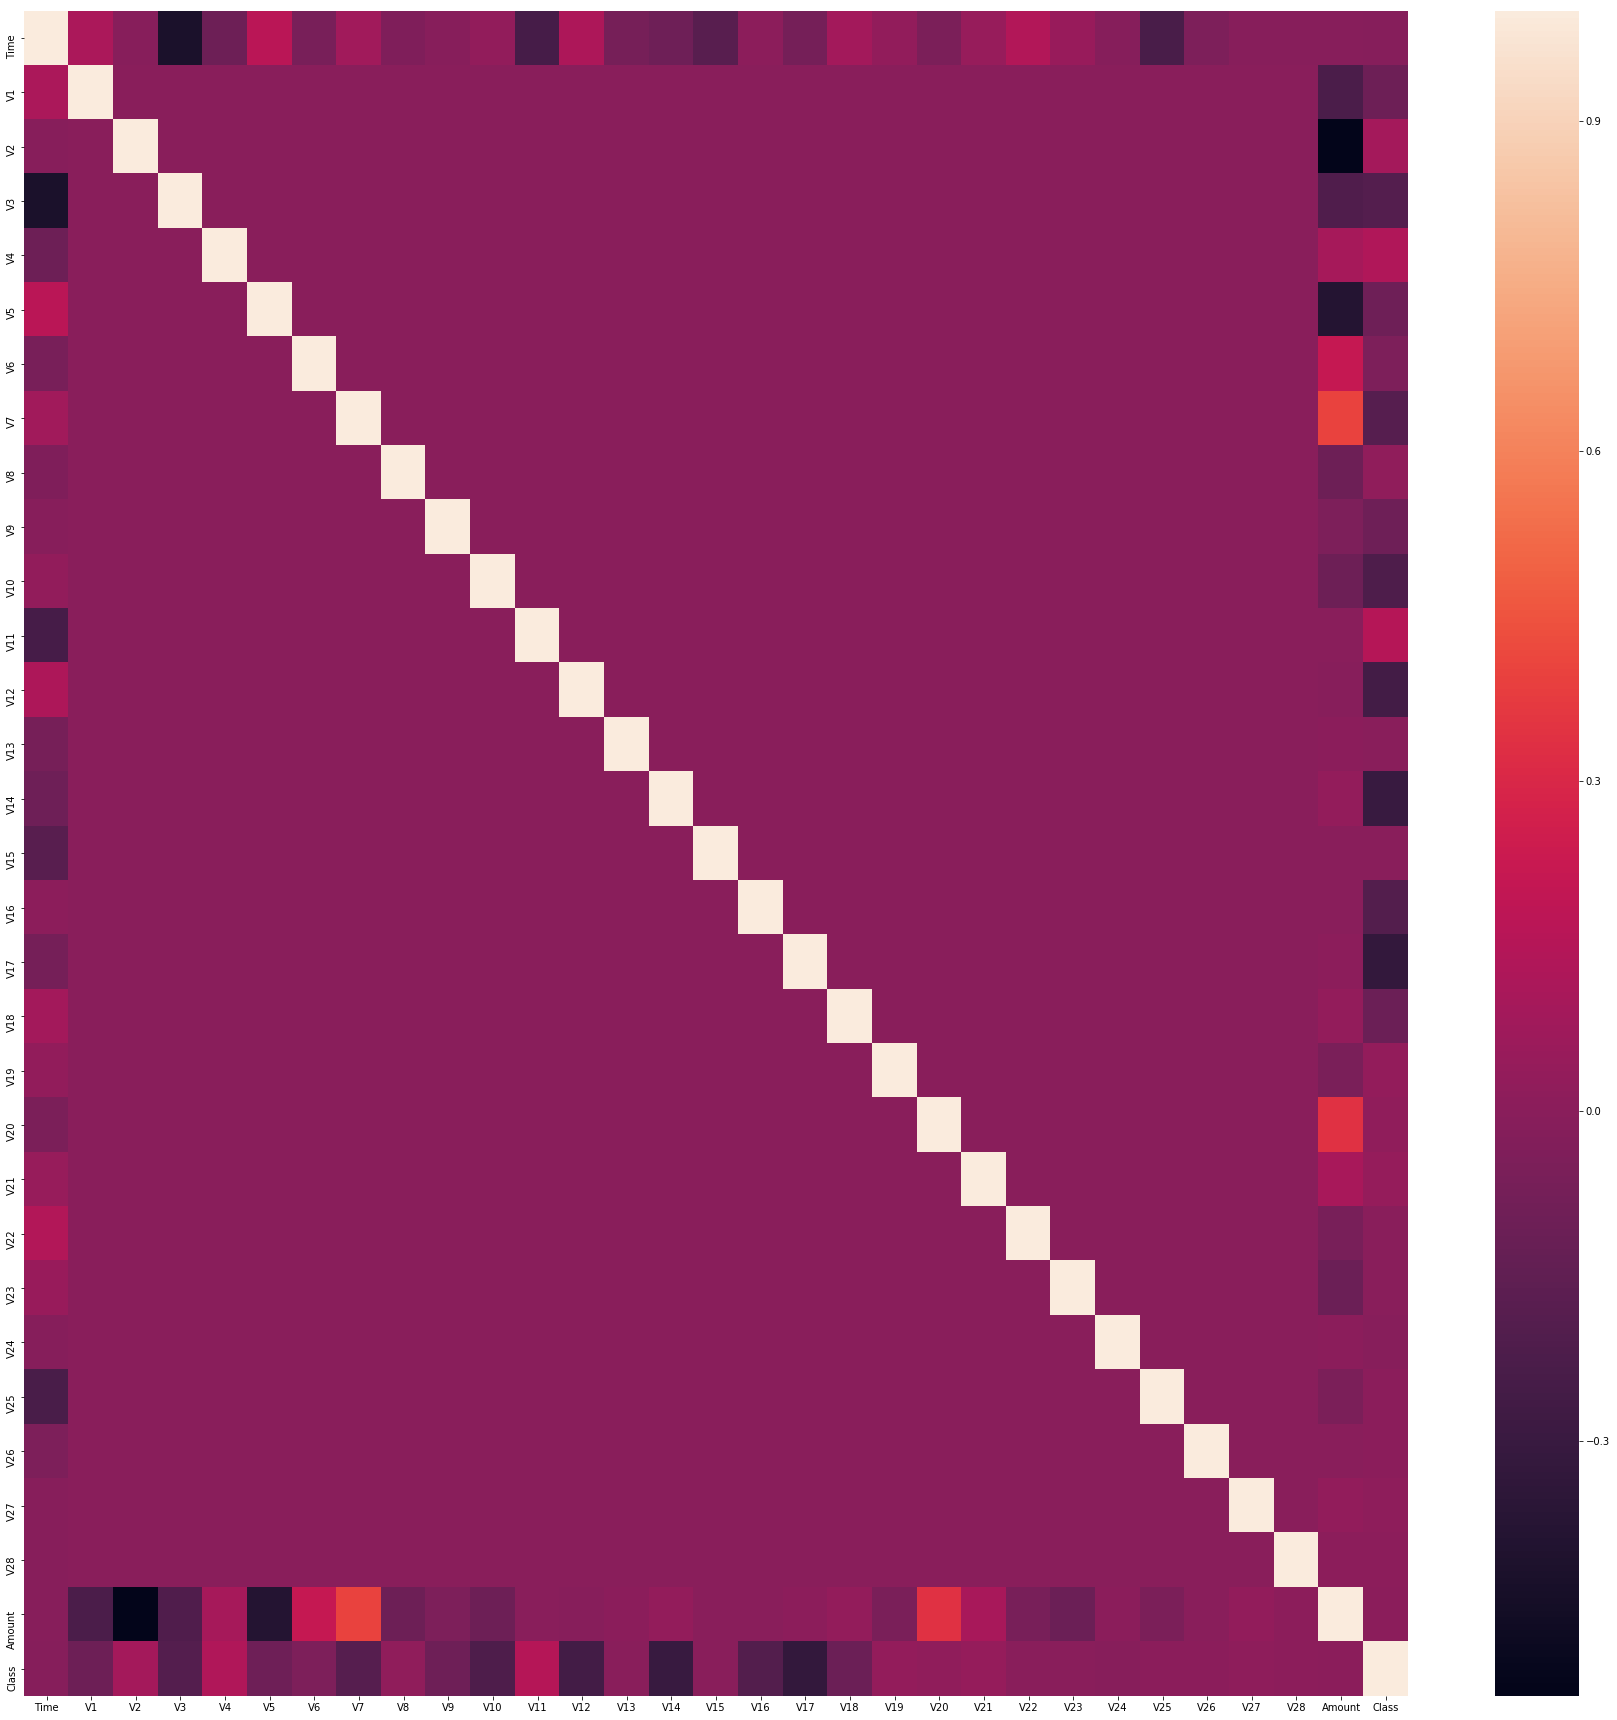

In [30]:
fig = plt.figure(figsize=(31,31))
sns.heatmap(correlation_matrix)
plt.show()

 Heat map shows small correlation between Features, not alarming.

### At this stage data looks good to start building model and evaluate performance

### Build and Evaluate model

    Split data, use one set for training and other set for evaluation
    We will use
        1) Isolation Forest algorithm
        2) LocalOutlierFactor algorithm



Split data into training-set and test-set [80 -20 ratio]

In [31]:
from sklearn.model_selection import train_test_split
y = dataFrame['Class']
X = dataFrame.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [32]:
print ("training data set : ",X_train.shape)
print ("test data set : ",X_test.shape)
print ("number of Fraud cases in training set : ",len(y_train[y_train==1]))
print ("number of Fraud cases in test set : ",len(y_test[y_test==1]))

training data set :  (227845, 30)
test data set :  (56962, 30)
number of Fraud cases in training set :  385
number of Fraud cases in test set :  107


### 1) Isolation Forest algorithm

In [33]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest

fraud_fraction = len(y_train[y_train==1])/float(len(y_train[y_train==0]))
number_of_train_samples=len(X_train)

# fit the model
clf=IsolationForest(n_estimators=100, max_samples=number_of_train_samples,contamination=fraud_fraction,random_state=None, verbose=0)
clf.fit(X_train)

#predict on training set
y_pred_train = clf.predict(X_train)

#predict on test set
y_pred_test = clf.predict(X_test)

#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred_train[y_pred_train == 1] = 0
y_pred_train[y_pred_train == -1] = 1

y_pred_test[y_pred_test == 1] = 0
y_pred_test[y_pred_test == -1] = 1


print("-----------------------------------------------------------")
print("Score on Test set")
print("Error count : ",(y_test!=y_pred_test).sum())
print("Accuracy Score:")
print(accuracy_score(y_test,y_pred_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_test))

print("-----------------------------------------------------------")
print("Score on training set")
print("Error count : ",(y_train != y_pred_train).sum())
print("Accuracy Score:")
print(accuracy_score(y_train,y_pred_train))
print("Classification Report:")
print(classification_report(y_train,y_pred_train))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


-----------------------------------------------------------
Score on Test set
Error count :  130
Accuracy Score:
0.9977177767634563
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.39      0.36      0.37       107

    accuracy                           1.00     56962
   macro avg       0.69      0.68      0.69     56962
weighted avg       1.00      1.00      1.00     56962

-----------------------------------------------------------
Score on training set
Error count :  515
Accuracy Score:
0.9977396914569115
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227460
           1       0.33      0.33      0.33       385

    accuracy                           1.00    227845
   macro avg       0.67      0.67      0.67    227845
weighted avg       1.00      1.00      1.00    227845



### 2) LocalOutlierFactor algorithm

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import LocalOutlierFactor

fraud_fraction = len(y_train[y_train==1])/float(len(y_train[y_train==0]))
number_of_train_samples=len(X_train)

# fit the model
clf=LocalOutlierFactor(n_neighbors=20, algorithm='auto',leaf_size=30, metric='minkowski',p=2, metric_params=None, contamination=fraud_fraction)
clf.fit(X_train)


#predict on training set
y_pred_train = clf.fit_predict(X_train)

#predict on test set
y_pred_test = clf.fit_predict(X_test)


#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred_train[y_pred_train == 1] = 0
y_pred_train[y_pred_train == -1] = 1

y_pred_test[y_pred_test == 1] = 0
y_pred_test[y_pred_test == -1] = 1


print("-----------------------------------------------------------")
print("Score on Test set")
print("Error count : ",(y_test != y_pred_test).sum())
print("Accuracy Score:")
print(accuracy_score(y_test,y_pred_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_test))

print("-----------------------------------------------------------")
print("Score on training set")
print("Error count : ",(y_train != y_pred_train).sum())
print("Accuracy Score:")
print(accuracy_score(y_train,y_pred_train))
print("Classification Report:")
print(classification_report(y_train,y_pred_train))

### Observations
 - Isolation Forest has slightly better accuracy compared to LocalOutlierFactor
 - Isolation Forest has lesser number of error counts compared to LocalOutlierFactor
 
Overall, Isolation Forest appears to be better choice. However, deep learning approach may outperform Isolation Forest but it will require higher compute time for training and larger data-set.

